# Cleaning data in R

## Background for this activity

In this activity, you'll review a scenario, and focus on cleaning real data in R. You will learn more about data cleaning functions and perform basic calculations to gain initial insights into your data.

Throughout this activity, you will also have the opportunity to practice writing your own code by making changes to the code chunks yourself.

## The scenario

In this scenario, you are a junior data analyst working for a hotel booking company. You have been asked to clean a .csv file that was created after querying a database to combine two different tables from different hotels. In order to learn more about this data, you are going to need to use functions to preview the data's structure, including its columns and rows. You will also need to use basic cleaning functions to prepare this data for analysis.  

## Step 1: Load packages

In order to start cleaning your data, you will need to  by install the required packages.

install.packages("tidyverse")
install.packages("skimr")
install.packages("janitor")

Once a package is installed, you can load it by running the `library()` function with the package name inside the parentheses:

In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(scales)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Step 2: Import data

The data you have been asked to clean is currently an external .csv file. In order to view and clean it in `R`, you will need to import it. The `tidyverse` library `readr` package has a number of functions for "reading in" or importing data, including .csv files. 

In the chunk below, you will use the `read_csv()` function to import data from a .csv file in the project folder called "hotel_bookings.csv" and save it as a data frame called `bookings_df`:

If this line causes an error, copy in the line setwd("path/to/your/project") before it.

In [2]:
setwd("~/dev/projects/data-science/learning/R")

bookings_df <- read_csv("hotel_bookings.csv")

Rows: 119390 Columns: 32
── Column specification ────────────────────────────────────────────────────
Delimiter: ","
chr  (13): hotel, arrival_date_month, meal, country, market_segment, distrib...
dbl  (18): is_canceled, lead_time, arrival_date_year, arrival_date_week_numb...
date  (1): reservation_status_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Step 3: Getting to know your data

Before you start cleaning your data, take some time to explore it. You can use several functions that you are already familiar with to preview your data, including the `head()` function in the code chunk below:

In [3]:
head(bookings_df)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<date>
Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


You can also summarize or preview the data with the `str()` and `glimpse()` functions to get a better understanding of the data by running the code chunks below:

In [4]:
str(bookings_df)

spc_tbl_ [119,390 × 32] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ hotel                         : chr [1:119390] "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : num [1:119390] 0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : num [1:119390] 342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : num [1:119390] 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr [1:119390] "July" "July" "July" "July" ...
 $ arrival_date_week_number      : num [1:119390] 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : num [1:119390] 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : num [1:119390] 0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : num [1:119390] 0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : num [1:119390] 2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : num [1:119390] 0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : num [1:119390] 

In [5]:
glimpse(bookings_df)

Rows: 119,390
Columns: 32
$ hotel                          <chr> "Resort Hotel", "Resort Hotel", "Resort…
$ is_canceled                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, …
$ lead_time                      <dbl> 342, 737, 7, 13, 14, 14, 0, 9, 85, 75, …
$ arrival_date_year              <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ arrival_date_month             <chr> "July", "July", "July", "July", "July",…
$ arrival_date_week_number       <dbl> 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,…
$ arrival_date_day_of_month      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ stays_in_weekend_nights        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ stays_in_week_nights           <dbl> 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, …
$ adults                         <dbl> 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ children                       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ babies                         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ meal        

You can also use `colnames()` to check the names of the columns in your data set. Run the code chunk below to find out the column names in this data set:

In [6]:
colnames(bookings_df)

[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "agent"                         
[25] "company"                        "days_in_waiting_list"          
[27] "customer_type"                  "adr"                           
[29] "required_car_parking_spaces"    "total_of_special_requests"     
[31] "reservation_status"             "reservation_status_date"

Some packages contain more advanced functions for summarizing and exploring your data. One example is the `skimr` package, which has a number of functions for this purpose. For example, the `skim_without_charts()` function provides a detailed summary of the data. Try running the code below:

## Step 4: Cleaning your data

Based on the functions you have used so far, how would you describe your data in a brief to your stakeholder? Now, let's say you are primarily interested in the following variables: 'hotel', 'is_canceled', and 'lead_time'. Create a new data frame with just those columns, calling it `trimmed_df` by adding the variable names to this code chunk:

In [7]:
trimmed_df <- bookings_df %>%
  select('hotel', 'is_canceled', 'lead_time')
head(trimmed_df)

hotel,is_canceled,lead_time
<chr>,<dbl>,<dbl>
Resort Hotel,0,342
Resort Hotel,0,737
Resort Hotel,0,7
Resort Hotel,0,13
Resort Hotel,0,14
Resort Hotel,0,14


You might notice that some of the column names aren't very intuitive, so you will want to rename them to make them easier to understand. You might want to create the same exact data frame as above, but rename the variable 'hotel' to be named 'hotel_type' to be crystal clear on what the data is about

Fill in the space to the left of the '=' symbol with the new variable name:

In [8]:
trimmed_df <- bookings_df %>%
  select('hotel', 'is_canceled', 'lead_time')%>%
  rename('hotel_type' = hotel)
head(trimmed_df)

hotel_type,is_canceled,lead_time
<chr>,<dbl>,<dbl>
Resort Hotel,0,342
Resort Hotel,0,737
Resort Hotel,0,7
Resort Hotel,0,13
Resort Hotel,0,14
Resort Hotel,0,14


Another common task is to either split or combine data in different columns. In this example, you can combine the arrival month and year into one column using the unite() function. As an intermediate step, you will convert arrival_date_month to a date format `mm` first:

In [9]:
trimmed_df <- bookings_df %>%
  select('hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month') %>%
  rename('hotel_type' = hotel) %>%
  mutate(arrival_date_month = sprintf("%02d", match(arrival_date_month, month.name))) %>%
  unite('arrival_year_month', c('arrival_date_year', 'arrival_date_month'), sep = "-")
head(trimmed_df)

hotel_type,is_canceled,lead_time,arrival_year_month
<chr>,<dbl>,<dbl>,<chr>
Resort Hotel,0,342,2015-07
Resort Hotel,0,737,2015-07
Resort Hotel,0,7,2015-07
Resort Hotel,0,13,2015-07
Resort Hotel,0,14,2015-07
Resort Hotel,0,14,2015-07


You can also use the`mutate()` function to make changes to your columns. Let's say you wanted to create a new column that summed up all the adults, children, and babies on a reservation for the total number of people. Modify the code chunk below to create that new column:  

In [10]:
trimmed_df <- bookings_df %>%
  select('hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies') %>%
  rename('hotel_type' = hotel) %>%
  mutate(arrival_date_month = sprintf("%02d", match(arrival_date_month, month.name))) %>%
  unite('arrival_year_month', c('arrival_date_year', 'arrival_date_month'), sep = "-") %>%
  mutate(guests = adults + children + babies)
head(trimmed_df)

hotel_type,is_canceled,lead_time,arrival_year_month,adults,children,babies,guests
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Resort Hotel,0,342,2015-07,2,0,0,2
Resort Hotel,0,737,2015-07,2,0,0,2
Resort Hotel,0,7,2015-07,1,0,0,1
Resort Hotel,0,13,2015-07,1,0,0,1
Resort Hotel,0,14,2015-07,2,0,0,2
Resort Hotel,0,14,2015-07,2,0,0,2


Let's do some final cleaning. You can remove the adults, children, and babies columns by using the `subset()` function and the `-` symbol to remove them. Then, you can remove any rows with missing values using the `drop_na()` function:

In [11]:
trimmed_df <- bookings_df %>%
  select('hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies') %>%
  rename('hotel_type' = hotel) %>%
  mutate(arrival_date_month = sprintf("%02d", match(arrival_date_month, month.name))) %>%
  unite('arrival_year_month', c('arrival_date_year', 'arrival_date_month'), sep = "-") %>%
  mutate(guests = adults + children + babies) %>%
  subset(select = -c(adults, children, babies)) %>%
  drop_na()
head(trimmed_df)

hotel_type,is_canceled,lead_time,arrival_year_month,guests
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Resort Hotel,0,342,2015-07,2
Resort Hotel,0,737,2015-07,2
Resort Hotel,0,7,2015-07,1
Resort Hotel,0,13,2015-07,1
Resort Hotel,0,14,2015-07,2
Resort Hotel,0,14,2015-07,2


In [12]:
example_df <- bookings_df %>%
  summarize(number_canceled = sum(is_canceled),
            average_lead_time = mean(lead_time))

head(example_df)

number_canceled,average_lead_time
<dbl>,<dbl>
44224,104.0114


## Step 5: Some statistics

Great. Now it's time to calculate some summary statistics! 

Calculate the total number of canceled bookings and the average lead time for booking - you'll want to start your code after the %>% symbol. 

Make a column called 'number_canceled' to represent the total number of canceled bookings. 

Then, make a column called 'average_lead_time' to represent the average lead time. 

Use the `summarize()` function to do this in the code chunk below:

In [13]:
summarized_bookings_df <- trimmed_df %>%
  group_by(arrival_year_month) %>%
  summarize(number_canceled = sum(is_canceled), total_bookings = n(), average_lead_time = round(mean(lead_time), digits = 0)) %>%
  mutate(percentage_canceled = percent(number_canceled / total_bookings, accuracy = 1)) %>%
  relocate(percentage_canceled, .after = total_bookings) %>%
  relocate(number_canceled, .after = total_bookings) 

head(summarized_bookings_df)

arrival_year_month,total_bookings,number_canceled,percentage_canceled,average_lead_time
<chr>,<int>,<dbl>,<chr>,<dbl>
2015-07,2776,1259,45%,126
2015-08,3885,1594,41%,99
2015-09,5114,2094,41%,123
2015-10,4957,1732,35%,102
2015-11,2340,486,21%,48
2015-12,2920,973,33%,52


Let's add final total row to the summarized data frame. 

In [14]:
total_row <- trimmed_df %>%
    summarize(
        arrival_year_month = 'TOTAL',
        total_bookings = n(),
        number_canceled = sum(is_canceled),
        average_lead_time = round(mean(lead_time), digits = 0)
    ) %>%
    mutate(percentage_canceled = percent(number_canceled / total_bookings, accuracy = 1))

final_hotel_stats <- bind_rows(summarized_bookings_df, total_row)

View(final_hotel_stats)

arrival_year_month,total_bookings,number_canceled,percentage_canceled,average_lead_time
<chr>,<int>,<dbl>,<chr>,<dbl>
2015-07,2776,1259,45%,126
2015-08,3885,1594,41%,99
2015-09,5114,2094,41%,123
2015-10,4957,1732,35%,102
2015-11,2340,486,21%,48
2015-12,2920,973,33%,52
2016-01,2248,557,25%,33
2016-02,3891,1337,34%,39
2016-03,4824,1477,31%,57


## Step 6: Drawing some charts

### Preparing the data

We start by filtering out any summary rows (like TOTAL) and calculating the number of non-canceled bookings. We also convert the month-year column to an ordered factor to ensure proper chronological ordering on the x-axis.

In [15]:
# Prepare the plot data by filtering and calculating metrics
plot_data <- summarized_bookings_df %>%
  filter(arrival_year_month != "TOTAL") %>%
  mutate(
    # Calculate non-canceled bookings by subtracting canceled from total
    not_canceled = total_bookings - number_canceled,
    # Convert to ordered factor for proper x-axis ordering
    arrival_year_month = factor(arrival_year_month, levels = unique(arrival_year_month))
  )

View(plot_data)

arrival_year_month,total_bookings,number_canceled,percentage_canceled,average_lead_time,not_canceled
<fct>,<int>,<dbl>,<chr>,<dbl>,<dbl>
2015-07,2776,1259,45%,126,1517
2015-08,3885,1594,41%,99,2291
2015-09,5114,2094,41%,123,3020
2015-10,4957,1732,35%,102,3225
2015-11,2340,486,21%,48,1854
2015-12,2920,973,33%,52,1947
2016-01,2248,557,25%,33,1691
2016-02,3891,1337,34%,39,2554
2016-03,4824,1477,31%,57,3347


### Reshape Data for Stacking

gplot2 requires data in "long format" for creating stacked bar charts. We use `pivot_longer()` to transform our data from wide to long format, where each row represents either canceled or not-canceled bookings.

In [16]:
# Transform data to long format for stacked bars
plot_data_long <- plot_data %>%
  # Select only the columns we need
  select(arrival_year_month, number_canceled, not_canceled, average_lead_time) %>%
  # Pivot the canceled/not_canceled columns into rows
  pivot_longer(cols = c(number_canceled, not_canceled), 
               names_to = "booking_status", 
               values_to = "count") %>%
  # Create a proper factor with meaningful labels
  mutate(booking_status = factor(booking_status, 
                                  levels = c("number_canceled", "not_canceled"),
                                  labels = c("Canceled", "Not Canceled")))
head(plot_data_long)

arrival_year_month,average_lead_time,booking_status,count
<fct>,<dbl>,<fct>,<dbl>
2015-07,126,Canceled,1259
2015-07,126,Not Canceled,1517
2015-08,99,Canceled,1594
2015-08,99,Not Canceled,2291
2015-09,123,Canceled,2094
2015-09,123,Not Canceled,3020


### Calculate Secondary Axis Scaling

Since we're plotting two different metrics (count of bookings and average lead time in days), we need to scale one of them to fit on the same plot. We calculate a scaling factor based on the ratio of maximum values.

In [17]:
# Calculate scaling factor for the secondary y-axis
scale_factor <- max(plot_data$total_bookings) / max(plot_data$average_lead_time)
scale_factor

[1] 41.26144

This factor will be used to:
- Scale up the lead time values when plotting
- Scale down the axis labels to show the original values

## Build the Base Plot

Now we start building our visualization layer by layer. We begin with an empty ggplot object and add the stacked bars.

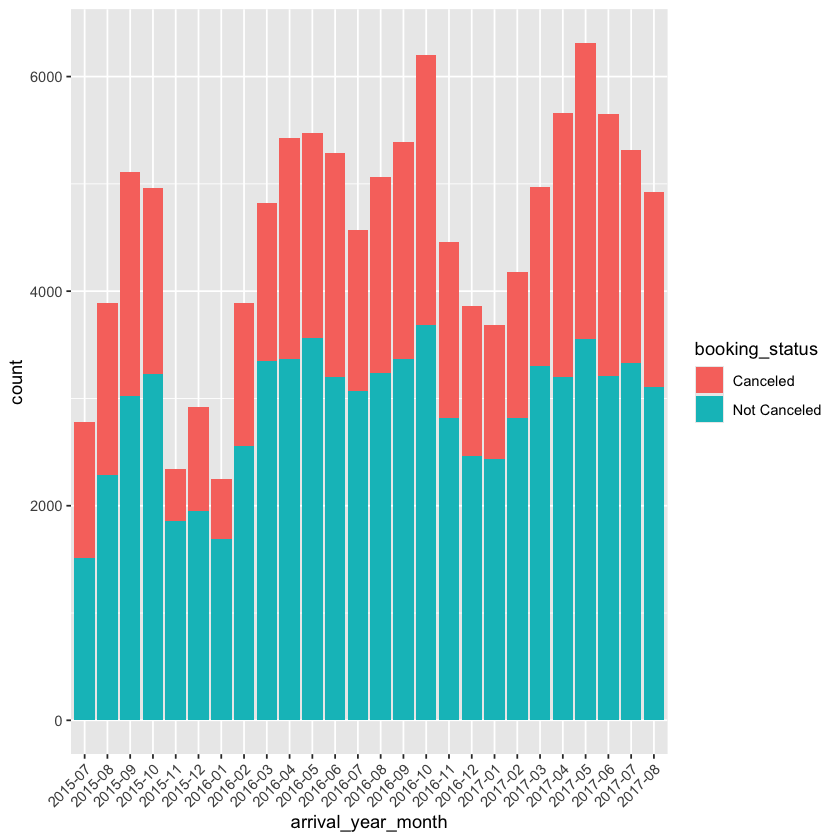

In [18]:
# Initialize the plot
p <- ggplot() +
  # Add stacked bar chart using long format data
  geom_bar(data = plot_data_long,
           aes(x = arrival_year_month, 
               y = count, 
               fill = booking_status), 
           stat = "identity",
           position = "stack") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

The `position = "stack"` parameter ensures that canceled bookings appear at the bottom and non-canceled bookings stack on top.

Let's reduce the number of labels on the x-axis to make the chart more readable.

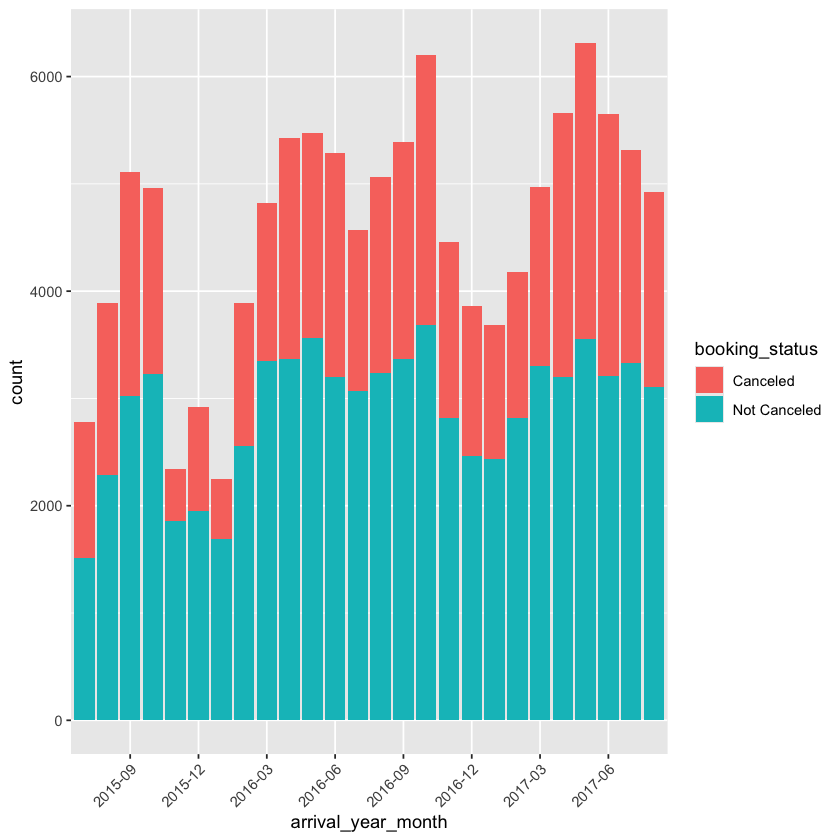

In [19]:
breaks_every_3 <- plot_data_long$arrival_year_month[seq(5, nrow(plot_data_long), by = 6)]
p <- p +
  scale_x_discrete(breaks = breaks_every_3)
p

### Add the Line Plot for Lead Time

Next, we overlay a line plot showing the average lead time trend. Note that we multiply the values by our scale factor to align them with the primary y-axis.

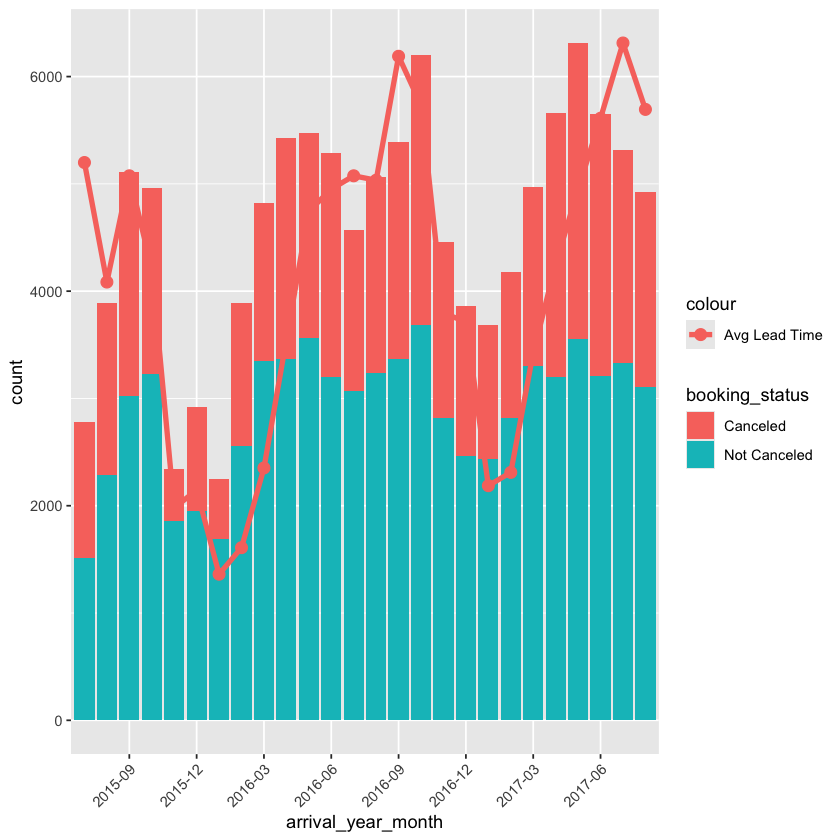

In [20]:
p <- p +
  # Add line for average lead time (scaled for secondary axis)
  geom_line(data = plot_data,
            aes(x = arrival_year_month, 
                y = average_lead_time * scale_factor, 
                group = 1,  # Ensures continuous line
                color = "Avg Lead Time"), 
            linewidth = 1.5) +
  # Add points to highlight individual values
  geom_point(data = plot_data,
             aes(x = arrival_year_month, 
                 y = average_lead_time * scale_factor, 
                 color = "Avg Lead Time"), 
             size = 3)

p

### Configure Dual Y-Axes

We set up the primary y-axis for booking counts and add a secondary y-axis for lead time. The secondary axis uses our scale factor to show the correct values.

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


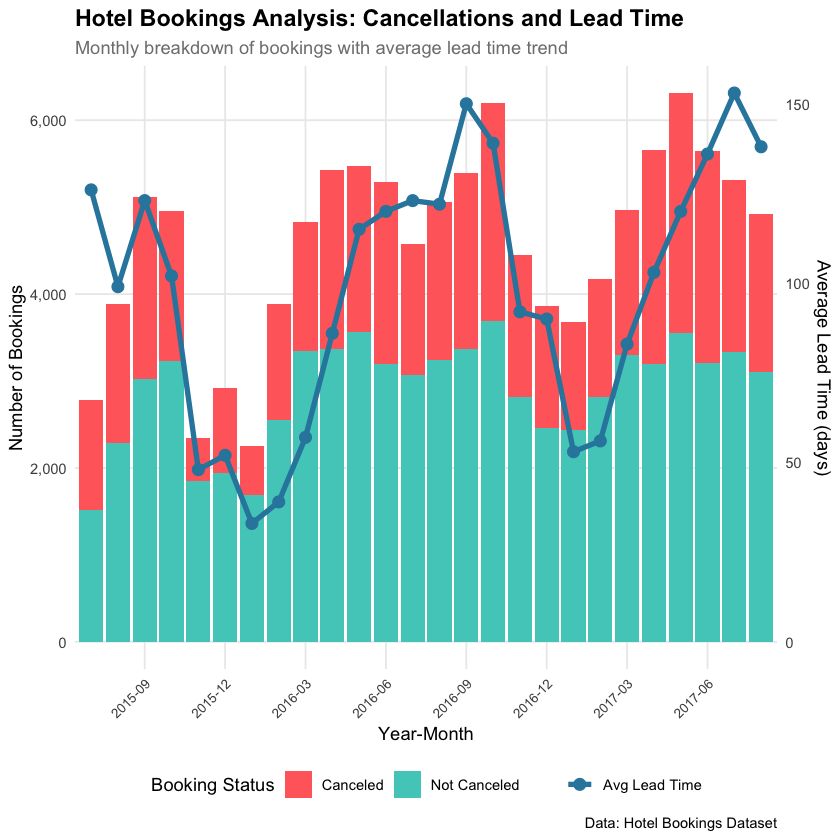

In [24]:
p <- p +
  scale_y_continuous(
    name = "Number of Bookings",
    labels = comma,  # Format large numbers with commas
    # Add secondary axis with inverse scaling transformation
    sec.axis = sec_axis(~./scale_factor, 
                        name = "Average Lead Time (days)")
  )
p

### Customize Colors and Legends

Define custom colors for better visual distinction and create meaningful legends.


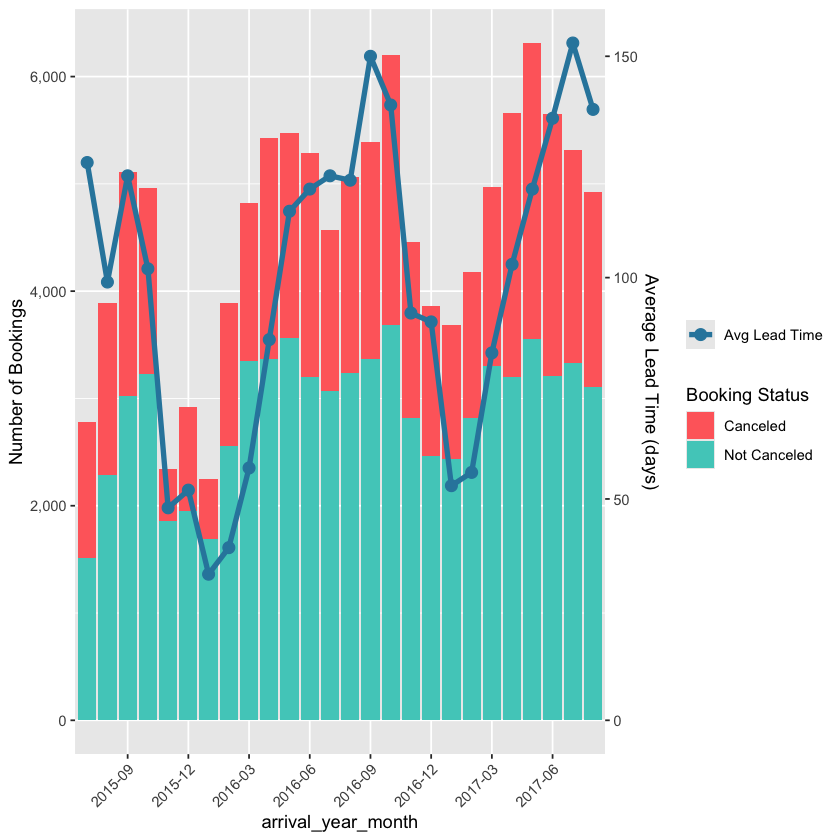

In [22]:
p <- p +
  # Colors for stacked bars
  scale_fill_manual(
    name = "Booking Status",
    values = c("Canceled" = "#FF6B6B",      # Red for canceled
               "Not Canceled" = "#4ECDC4")  # Teal for not canceled
  ) +
  # Color for the line plot
  scale_color_manual(
    name = "",
    values = c("Avg Lead Time" = "#2E86AB")  # Blue for lead time
  )
p

### Add Labels and Apply Theme

Finally, we add informative labels and apply a clean theme to enhance readability.

Saving 6.67 x 6.67 in image


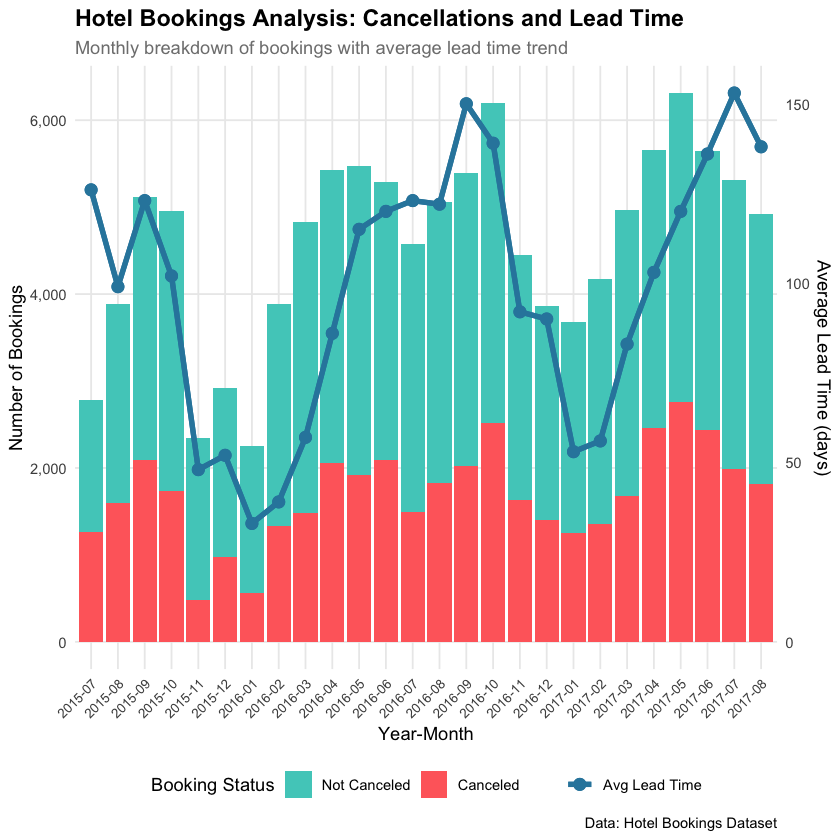

In [42]:
p <- p +
  # Add titles and labels
  labs(
    title = "Hotel Bookings Analysis: Cancellations and Lead Time",
    subtitle = "Monthly breakdown of bookings with average lead time trend",
    x = "Year-Month",
    caption = "Data: Hotel Bookings Dataset"
  ) +
  # Apply minimal theme for clean appearance
  theme_minimal() +
  # Customize theme elements
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    legend.position = "bottom",
    legend.box = "horizontal",
    plot.title = element_text(size = 14, face = "bold"),
    plot.subtitle = element_text(size = 11, color = "gray50"),
    panel.grid.minor = element_blank()
  ) +
  # Control legend ordering
  guides(fill = guide_legend(order = 1),
         color = guide_legend(order = 2))
print(p)
ggsave("Hotel Bookings Analysis cancellation lead tim.png")